# Loading Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing files and appending

In [7]:
import os
file_path = []
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        file_path.append(os.path.join(dirname, filename))

In [8]:
df = pd.DataFrame()
for file in file_path:
    temp = pd.read_csv(file)
    df = pd.concat([df, temp], axis = 0, ignore_index = True)

# Data cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [10]:
df = df.dropna(how='all', inplace=False)
df.drop(df.loc[df['Order ID'] =='Order ID'].index.tolist(), axis=0,inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


# Downloading Appended and cleaned dataset

In [11]:
df.to_csv (r'export_dataframe.csv', index = False, header=True)


# Data Preprocessing

In [12]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']).astype(int)
df['Price Each'] = pd.to_numeric(df['Price Each']).astype(float)
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [13]:
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

In [14]:
df['Month'] = df['Order Date'].dt.month
df['Hour'] = df['Order Date'].dt.hour
#Using lambda to take out the middle part of Purchase Address, store in new column as City
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,Month,Hour,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,0,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,7,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,18,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,15,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,12,Atlanta


# Getting Insights from data

In [15]:
monthly_revenue = df.groupby('Month').sum()
monthly_revenue

,Quantity Ordered,Price Each,Revenue,Hour
Month,,,,
1,10903,1811768.38,1822256.73,139485
2,13449,2188884.72,2202022.42,172669
3,17005,2791207.83,2807100.38,218969
4,20558,3367671.02,3390670.24,262259
5,18667,3135125.13,3152606.75,238780
6,15253,2562025.61,2577802.26,195528
7,16072,2632539.56,2647775.76,206169
8,13448,2230345.42,2244467.88,172289
9,13109,2084992.09,2097560.13,168513


In [20]:
year_revenue = monthly_revenue['Revenue'].sum()
year_revenue

34492035.97

# Visual representation of monthly revenue in 2019

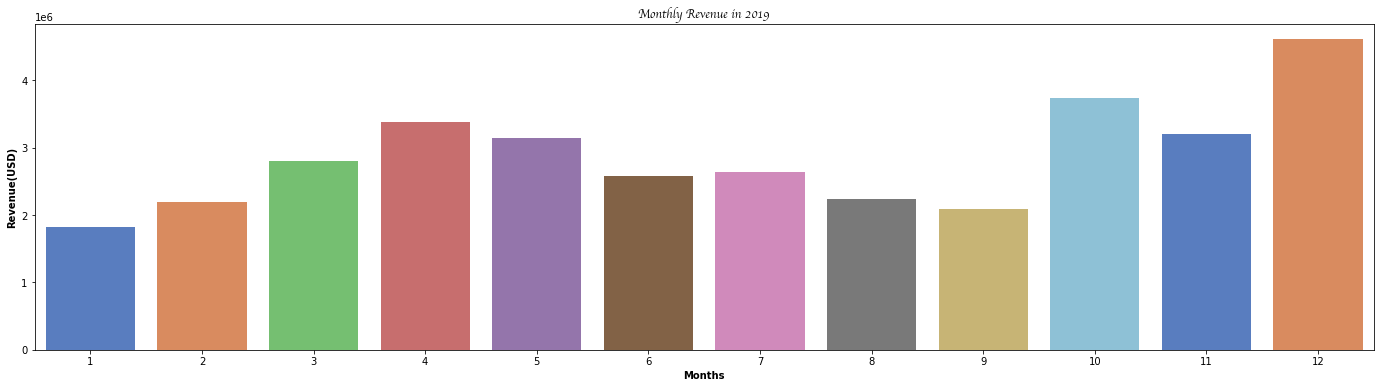

In [16]:
plt.figure(figsize = (24, 6))

sns.barplot(x = monthly_revenue.index, y = monthly_revenue['Revenue'], data = monthly_revenue, palette = 'muted')

plt.title('Monthly Revenue in 2019', fontname = 'cursive', weight = 'bold')
# x-label
plt.xlabel('Months', weight = 'bold')
# y-label
plt.ylabel('Revenue(USD)', weight = 'bold');

In [17]:
city_sales = df.groupby(['City']).sum()
city_sales

,Quantity Ordered,Price Each,Revenue,Month,Hour
City,,,,,
Atlanta,16602,2779908.20,2795498.58,104794,214264
Austin,11153,1809873.61,1819581.75,69829,141946
Boston,22528,3637409.77,3661642.01,141112,288225
Dallas,16730,2752627.82,2767975.40,104620,214390
Los Angeles,33289,5421435.23,5452570.80,208325,427444
New York City,27932,4635370.83,4664317.43,175741,357696
Portland,14053,2307747.47,2320490.61,87765,179632
San Francisco,50239,8211461.74,8262203.91,315520,643265
Seattle,16553,2733296.01,2747755.48,104941,213292


In [18]:
city_sales['Revenue'].mean()

3832448.441111111

# Cities and their sales

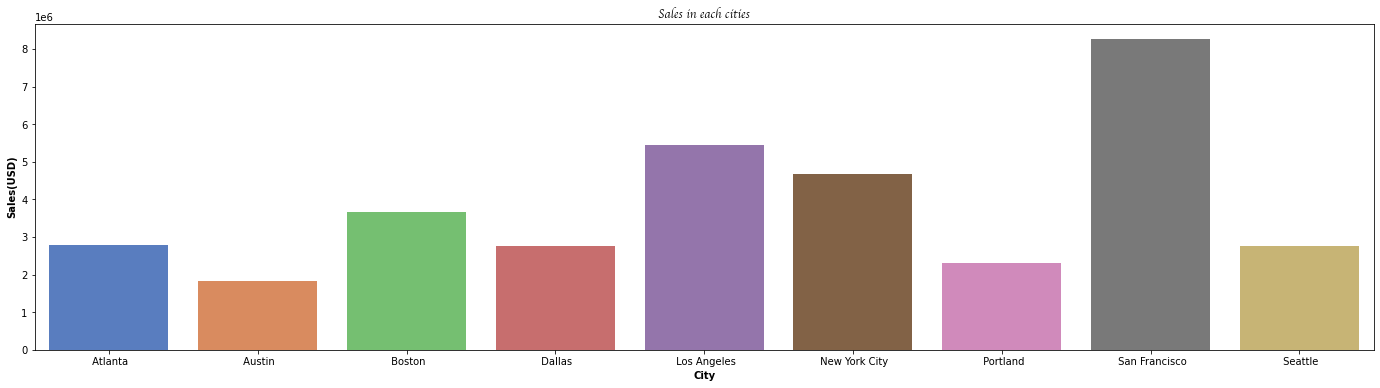

In [19]:
plt.figure(figsize = (24, 6))

sns.barplot(x = city_sales.index, y = city_sales['Revenue'], data = city_sales, palette = 'muted')

plt.title('Sales in each cities', fontname = 'cursive', weight = 'bold')
# x-label
plt.xlabel('City', weight = 'bold')
# y-label
plt.ylabel('Sales(USD)', weight = 'bold');

In [20]:
hourly_sales = df.groupby(['Hour']).sum()
hourly_sales

,Quantity Ordered,Price Each,Revenue,Month
Hour,,,,
0,4428,709296.70,713721.27,27554
1,2619,458490.00,460866.88,16657
2,1398,233833.64,234851.44,8507
3,928,144726.42,145757.89,5904
4,937,162058.18,162661.01,6148
5,1493,229621.21,230679.82,9301
6,2810,445000.11,448113.00,17539
7,4556,740568.11,744854.12,28850
8,7002,1185970.62,1192348.97,43626


# Peak hours of the day

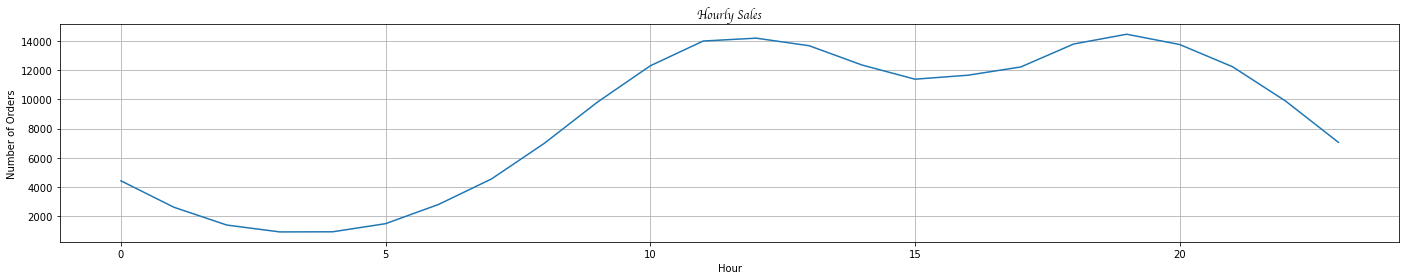

In [22]:
plt.figure(figsize=(24, 4))
plt.plot(hourly_sales.index, hourly_sales['Quantity Ordered'])

plt.grid(True)
plt.title('Hourly Sales', fontname='cursive', weight='bold')
# x-label
plt.xlabel('Hour')
# y-label
plt.ylabel('Number of Orders');

In [23]:
products = df.groupby('Product').agg({'Quantity Ordered' : 'sum', 'Price Each' : 'mean', 'Revenue' : 'sum'})
products

,Quantity Ordered,Price Each,Revenue
Product,,,
20in Monitor,4129,109.99,454148.71
27in 4K Gaming Monitor,6244,389.99,2435097.56
27in FHD Monitor,7550,149.99,1132424.50
34in Ultrawide Monitor,6199,379.99,2355558.01
AA Batteries (4-pack),27635,3.84,106118.40
AAA Batteries (4-pack),31017,2.99,92740.83
Apple Airpods Headphones,15661,150.00,2349150.00
Bose SoundSport Headphones,13457,99.99,1345565.43
Flatscreen TV,4819,300.00,1445700.00


# Products Sold 

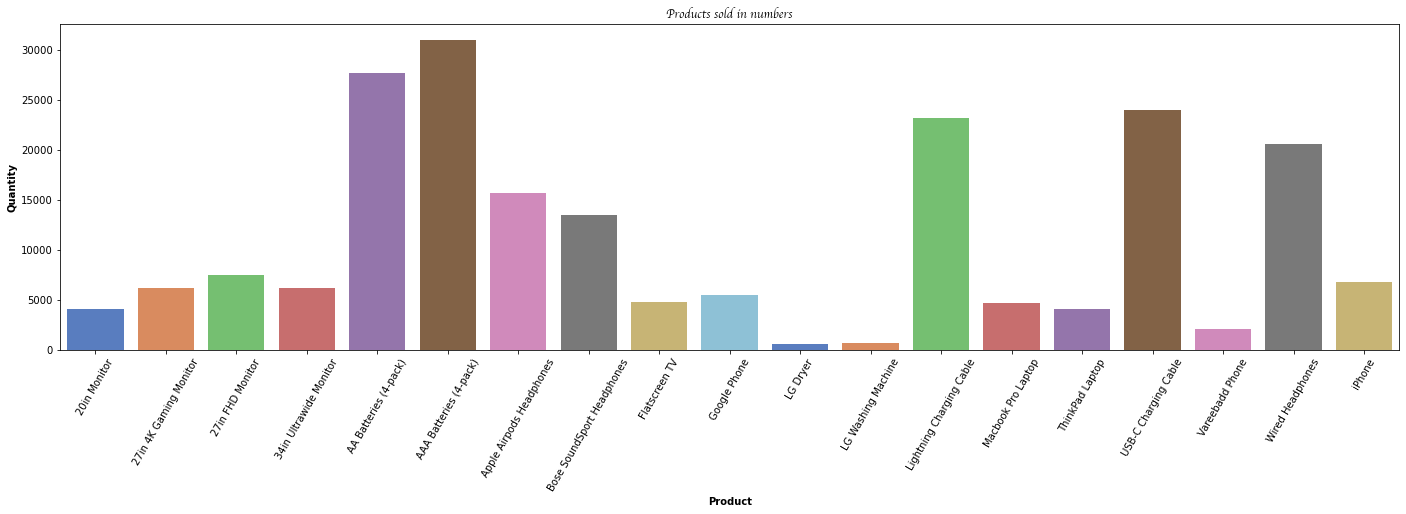

In [28]:
plt.figure(figsize = (24, 6))

sns.barplot(x = products.index, y = products['Quantity Ordered'], data = products, palette = 'muted')

plt.title('Products sold in numbers', fontname = 'cursive', weight = 'bold')
# x-label
plt.xlabel('Product', weight = 'bold')
degrees = 60
plt.xticks(rotation = degrees)
# y-label
plt.ylabel('Quantity', weight = 'bold');